In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import io, requests, zipfile



'''Set the defaults for your plots.'''
# plt.rcParams.update({'font.size': 20, 'figsize':(8,6)})
SMALL_SIZE = 12
MEDIUM_SIZE = 15
BIGGER_SIZE = 18

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rc('axes', linewidth = 5 )
plt.rc('lines', linewidth = 5 )

plt.rc('lines', markersize = 5 )

plt.rc('figure', figsize=(8,4) )         # Image size

from zipfile import ZipFile


from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, SGDClassifier
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures , StandardScaler, RobustScaler
from sklearn.metrics import mean_squared_error  ## To calculate the loss
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import learning_curve, validation_curve


In [2]:
X = np.load('X.npz')['arr_0']
Y = np.load('Y.npz')['arr_0']

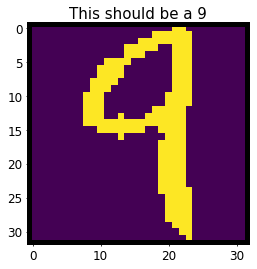

In [3]:
rand_ind = np.random.randint(0,100000)
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111,title = 'This should be a {}'.format(Y[rand_ind]))
ax.imshow(X[rand_ind])
plt.show()


In [4]:
X.shape 

(102352, 32, 32)

In [5]:
n = 1000

X = X.reshape(-1,32*32)
Y_actual = np.copy(Y)
X_actual = np.copy(X)
Y = Y[:n]
X = X[:n]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 0)
X.shape

(1000, 1024)

In [6]:
## Let's try a dummy classifier that constantly outputs the more probable class.
from sklearn.dummy import DummyClassifier

dm_clf = DummyClassifier(strategy='most_frequent')
dm_clf.fit(X_train, Y_train)
dm_Y_predicted = dm_clf.predict(X)
print('The dummy classifier can give a score of {} on the test data.'.format(dm_clf.score(X_test,Y_test)))

The dummy classifier can give a score of 0.06 on the test data.


In [7]:
dm_cnfmatrix = confusion_matrix(Y,dm_Y_predicted)
print(dm_cnfmatrix)

[[  0   0   0 105   0   0   0   0   0   0]
 [  0   0   0 101   0   0   0   0   0   0]
 [  0   0   0 104   0   0   0   0   0   0]
 [  0   0   0 109   0   0   0   0   0   0]
 [  0   0   0  89   0   0   0   0   0   0]
 [  0   0   0 109   0   0   0   0   0   0]
 [  0   0   0  78   0   0   0   0   0   0]
 [  0   0   0  91   0   0   0   0   0   0]
 [  0   0   0 106   0   0   0   0   0   0]
 [  0   0   0 108   0   0   0   0   0   0]]


In [8]:
from sklearn.metrics import classification_report
dm_clf_report = classification_report(Y, dm_Y_predicted)
print(dm_clf_report)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       105
           1       0.00      0.00      0.00       101
           2       0.00      0.00      0.00       104
           3       0.11      1.00      0.20       109
           4       0.00      0.00      0.00        89
           5       0.00      0.00      0.00       109
           6       0.00      0.00      0.00        78
           7       0.00      0.00      0.00        91
           8       0.00      0.00      0.00       106
           9       0.00      0.00      0.00       108

   micro avg       0.11      0.11      0.11      1000
   macro avg       0.01      0.10      0.02      1000
weighted avg       0.01      0.11      0.02      1000



In [23]:
from sklearn.model_selection import learning_curve, validation_curve
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier

In [15]:
svc_clf = SVC().fit(X_train,Y_train)
svc_clf.fit (X_test , Y_test)
print('SVC gives a score of {} on training data and \n {} on test data.'.format(svc_clf.score(X_train, Y_train ),svc_clf.score(X_test, Y_test )  )  )


SVC gives a score of 0.7493333333333333 on training data and 
 0.876 on test data.


In [16]:
svc_Y_predicted = svc_clf.predict(X)
svc_cnfmatrix = confusion_matrix(Y,svc_Y_predicted)
print(svc_cnfmatrix)

[[101   0   0   0   2   2   0   0   0   0]
 [  0  98   3   0   0   0   0   0   0   0]
 [  1   4  97   0   1   0   1   0   0   0]
 [  0   0  35   2  70   0   0   1   1   0]
 [  3   0  12   0  74   0   0   0   0   0]
 [  3   0   0   0   1  96   0   0   9   0]
 [  0   0  21   0   0   0  41   1   2  13]
 [  6   0   2   0   1   2  10  70   0   0]
 [  0   1   1   0   1   0   0   0 103   0]
 [  1   1   3   0   0   0   1   0   3  99]]


In [17]:
svc_clf_report = classification_report(Y, svc_Y_predicted)
print(svc_clf_report)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       105
           1       0.94      0.97      0.96       101
           2       0.56      0.93      0.70       104
           3       1.00      0.02      0.04       109
           4       0.49      0.83      0.62        89
           5       0.96      0.88      0.92       109
           6       0.77      0.53      0.63        78
           7       0.97      0.77      0.86        91
           8       0.87      0.97      0.92       106
           9       0.88      0.92      0.90       108

   micro avg       0.78      0.78      0.78      1000
   macro avg       0.83      0.78      0.75      1000
weighted avg       0.84      0.78      0.75      1000



In [18]:
knn_clf = KNeighborsClassifier(n_neighbors=3).fit(X_train,Y_train)
knn_clf.fit (X_test , Y_test)
knn_clf.score(X_test, Y_test ) 

0.936

In [19]:
knn_Y_predicted = knn_clf.predict(X)
knn_cnfmatrix = confusion_matrix(Y,knn_Y_predicted)
print(knn_cnfmatrix)

[[104   0   0   0   1   0   0   0   0   0]
 [  0 101   0   0   0   0   0   0   0   0]
 [  2   7  94   0   0   0   0   1   0   0]
 [  1   3  14  82   9   0   0   0   0   0]
 [  5   3   5   4  72   0   0   0   0   0]
 [  7   2   1   0   0  87   1   0  11   0]
 [  2   2  12   0   0   1  48   1   1  11]
 [  5   0   2   0   0   0   3  81   0   0]
 [  1   2   1   0   0   0   0   0 102   0]
 [  3   6   0   0   0   0   0   0   1  98]]


In [20]:
knn_clf_report = classification_report(Y, knn_Y_predicted)
print(knn_clf_report)

              precision    recall  f1-score   support

           0       0.80      0.99      0.89       105
           1       0.80      1.00      0.89       101
           2       0.73      0.90      0.81       104
           3       0.95      0.75      0.84       109
           4       0.88      0.81      0.84        89
           5       0.99      0.80      0.88       109
           6       0.92      0.62      0.74        78
           7       0.98      0.89      0.93        91
           8       0.89      0.96      0.92       106
           9       0.90      0.91      0.90       108

   micro avg       0.87      0.87      0.87      1000
   macro avg       0.88      0.86      0.86      1000
weighted avg       0.88      0.87      0.87      1000



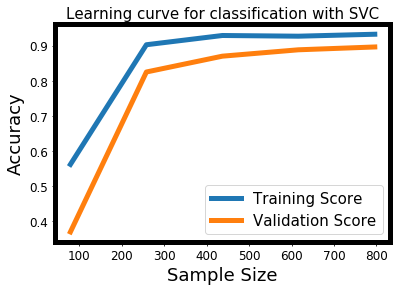

In [22]:
n, train_scores, validation_scores = learning_curve(
                                                   estimator = SVC(), X = X,
                                                   y = Y,  cv = 5,
                                                   scoring = 'accuracy')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

xlabel = 'Sample Size'
ylabel = 'Accuracy'

svc_title = 'Learning curve for classification with SVC'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=svc_title)
ax.plot(n, train_scores_mean, label = 'Training Score')
ax.plot(n, validation_scores_mean, label = 'Validation Score')
# plt.yscale('log')
ax.legend(loc=0)
plt.show()

In [27]:
sgd_clf = SGDClassifier().fit(X_train,Y_train)
sgd_clf.fit(X_test, Y_test)
print('The sgd classifier can give a score of {} on the test data.'.format(sgd_clf.score(X_test,Y_test)))

The sgd classifier can give a score of 1.0 on the test data.


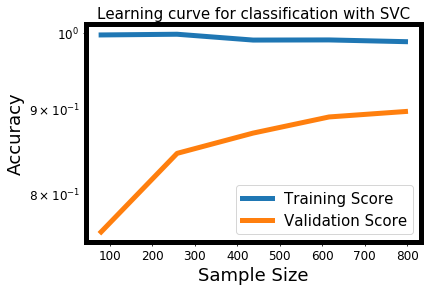

In [25]:
n, train_scores, validation_scores = learning_curve(
                                                   estimator = SGDClassifier(), X = X,
                                                   y = Y,  cv = 5,
                                                   scoring = 'accuracy')

train_scores_mean = train_scores.mean(axis = 1)
validation_scores_mean = validation_scores.mean(axis = 1)

xlabel = 'Sample Size'
ylabel = 'Accuracy'

svc_title = 'Learning curve for classification with SVC'

fig = plt.figure()
ax = fig.add_subplot(111, xlabel=xlabel, ylabel=ylabel, title=svc_title)
ax.plot(n, train_scores_mean, label = 'Training Score')
ax.plot(n, validation_scores_mean, label = 'Validation Score')
plt.yscale('log')
ax.legend(loc=0)
plt.show()

In [28]:
sgd_Y_predicted = sgd_clf.predict(X)
sgd_cnfmatrix = confusion_matrix(Y,sgd_Y_predicted)
print(sgd_cnfmatrix)

[[101   0   0   0   0   0   1   3   0   0]
 [  0  98   2   0   1   0   0   0   0   0]
 [  0   0  94   4   5   0   0   0   0   1]
 [  0   1   8  87  12   0   0   1   0   0]
 [  3   4   2   7  70   0   0   1   2   0]
 [  1   2   0   0   0 100   0   3   3   0]
 [  1   1   3   2   2   0  58   2   2   7]
 [  4   0   1   0   1   1   6  78   0   0]
 [  0   1   1   0   0   1   0   0 103   0]
 [  1   2   2   0   2   0   2   0   1  98]]


In [29]:
sgd_clf_report = classification_report(Y, sgd_Y_predicted)
print(sgd_clf_report)

              precision    recall  f1-score   support

           0       0.91      0.96      0.94       105
           1       0.90      0.97      0.93       101
           2       0.83      0.90      0.87       104
           3       0.87      0.80      0.83       109
           4       0.75      0.79      0.77        89
           5       0.98      0.92      0.95       109
           6       0.87      0.74      0.80        78
           7       0.89      0.86      0.87        91
           8       0.93      0.97      0.95       106
           9       0.92      0.91      0.92       108

   micro avg       0.89      0.89      0.89      1000
   macro avg       0.88      0.88      0.88      1000
weighted avg       0.89      0.89      0.89      1000

